## Chunk Model with Nouns and Verbs: LDA

## Resources

In [14]:
import pickle
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim

## Get Data

In [2]:
# Get it back
with open("20240220_PhD_ChkLem-NV.txt", "rb") as fp:   # Unpickling
    data_lemmatized = pickle.load(fp)

## LDA Model

In [3]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [4]:
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)]]


In [5]:
# To see word associated with id, use this code.
id2word[7]

'deal'

In [6]:
# This is the whole human readable list with frequencies
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('anxiety', 1),
  ('attend', 1),
  ('brother', 1),
  ('cause', 1),
  ('child', 1),
  ('conclude', 1),
  ('consign', 1),
  ('deal', 1),
  ('destination', 1),
  ('feeling', 1),
  ('find', 1),
  ('happening', 1),
  ('hiding', 1),
  ('incident', 1),
  ('island', 1),
  ('journal', 2),
  ('journey', 1),
  ('keep', 1),
  ('land', 1),
  ('leave', 1),
  ('letter', 2),
  ('lose', 1),
  ('map', 1),
  ('merit', 1),
  ('missione', 1),
  ('mother', 3),
  ('need', 1),
  ('occur', 1),
  ('outcast', 1),
  ('propose', 1),
  ('pupil', 1),
  ('read', 1),
  ('sacrifice', 1),
  ('save', 1),
  ('sister', 1),
  ('teacher', 1),
  ('thrill', 1)]]

## Identify the best number of topics

In [7]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [8]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

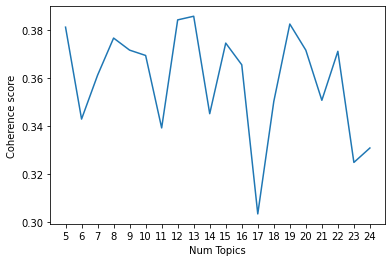

In [9]:
# Show graph
start = 5
limit = 25
step = 1
x = range(start, limit, step)
plt.xticks(range(min(x), max(x)+1))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('2024xxxx_PhD_TopicLetter-GenLDA.png', dpi=100)
plt.show()

In [10]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.3813
Num Topics = 6 Coherence:  0.343
Num Topics = 7 Coherence:  0.3613
Num Topics = 8 Coherence:  0.3767
Num Topics = 9 Coherence:  0.3717
Num Topics = 10 Coherence:  0.3695
Num Topics = 11 Coherence:  0.3393
Num Topics = 12 Coherence:  0.3843
Num Topics = 13 Coherence:  0.3858
Num Topics = 14 Coherence:  0.3452
Num Topics = 15 Coherence:  0.3746
Num Topics = 16 Coherence:  0.3656
Num Topics = 17 Coherence:  0.3034
Num Topics = 18 Coherence:  0.3503
Num Topics = 19 Coherence:  0.3826
Num Topics = 20 Coherence:  0.3717
Num Topics = 21 Coherence:  0.3508
Num Topics = 22 Coherence:  0.3712
Num Topics = 23 Coherence:  0.3249
Num Topics = 24 Coherence:  0.3309


In [11]:
m = 0
n = 5
for i in model_list:
    print("Num Topics =", n, 'Perplexity: ', model_list[m].log_perplexity(corpus))
    n=n+1
    m=m+1

Num Topics = 5 Perplexity:  -7.94806837586707
Num Topics = 6 Perplexity:  -8.00783186065812
Num Topics = 7 Perplexity:  -8.058377195480714
Num Topics = 8 Perplexity:  -8.14058129535426
Num Topics = 9 Perplexity:  -8.260455487455083
Num Topics = 10 Perplexity:  -8.453550121606657
Num Topics = 11 Perplexity:  -8.786534592987172
Num Topics = 12 Perplexity:  -9.306217736667321
Num Topics = 13 Perplexity:  -10.195298849294245
Num Topics = 14 Perplexity:  -11.361385039444965
Num Topics = 15 Perplexity:  -12.627017190440368
Num Topics = 16 Perplexity:  -13.977213310132955
Num Topics = 17 Perplexity:  -14.825376961395976
Num Topics = 18 Perplexity:  -15.270673403274412
Num Topics = 19 Perplexity:  -15.729442170600285
Num Topics = 20 Perplexity:  -16.101745185946207
Num Topics = 21 Perplexity:  -16.523420240685866
Num Topics = 22 Perplexity:  -16.93428628819624
Num Topics = 23 Perplexity:  -17.28960512993549
Num Topics = 24 Perplexity:  -17.743957028909417


Best (highest) coherence score is for the 12- (7), 13- (8) and 19-topic (14) models.

In [12]:
print(coherence_values[7])
print(coherence_values[8])
print(coherence_values[14])

0.3843227069393807
0.38584222994482875
0.38259829140113993


In [18]:
#GensimLDA_16.show_topics(formatted=False)
#GensimLDA_05.show_topics(formatted=False)

In [27]:
print("Coherence score for 12-topic model", coherence_values[7], "\n")

# View the topics
GensimLDA_12 = model_list[7]
pprint(sorted(GensimLDA_12.print_topics(num_words=10)))

# Visualize the topics

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(GensimLDA_12, corpus, id2word, sort_topics=False, mds='mmds')
vis

# Error for the 13-topic visualization in the letter series led to the "mmds" arguement in all visualizations. For details, see https://stackoverflow.com/questions/46379763/typeerror-object-of-type-complex-is-not-json-serializable-while-using-pyldavi

Coherence score for 12-topic model 0.3843227069393807 

[(0,
  '0.113*"property" + 0.093*"bear" + 0.076*"fill" + 0.050*"promise" + '
  '0.042*"practice" + 0.039*"enable" + 0.031*"prisoner" + 0.026*"wound" + '
  '0.024*"gun" + 0.023*"habitation"'),
 (1,
  '0.047*"employment" + 0.041*"village" + 0.040*"buy" + 0.035*"wage" + '
  '0.035*"farmer" + 0.031*"obtain" + 0.029*"manufacture" + 0.021*"flour" + '
  '0.018*"settler" + 0.017*"wheat"'),
 (2,
  '0.076*"cent" + 0.039*"lay" + 0.034*"building" + 0.030*"mill" + '
  '0.027*"opinion" + 0.026*"job" + 0.026*"circumstance" + 0.022*"maker" + '
  '0.021*"plan" + 0.020*"build"'),
 (3,
  '0.081*"city" + 0.062*"government" + 0.030*"advice" + 0.025*"lordship" + '
  '0.025*"cost" + 0.025*"observe" + 0.024*"mine" + 0.022*"merchant" + '
  '0.022*"contain" + 0.018*"fortune"'),
 (4,
  '0.035*"people" + 0.032*"dollar" + 0.023*"bring" + 0.020*"pay" + '
  '0.018*"water" + 0.017*"month" + 0.015*"kind" + 0.013*"sell" + '
  '0.012*"person" + 0.012*"set"'),
 (5,


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.112130 -0.023207       1        1   0.931185
1     -0.327787  0.257346       2        1   4.044021
2      0.286310 -0.308900       3        1   2.591161
3      0.181965  0.376558       4        1   3.911073
4     -0.101712  0.452449       5        1  16.233092
5     -0.415337 -0.004700       6        1   4.216892
6      0.237463 -0.081401       7        1   1.142607
7      0.483014  0.130833       8        1  46.449157
8     -0.353494 -0.317388       9        1  11.314541
9      0.026228 -0.127393      10        1   0.339534
10     0.114817  0.099776      11        1   0.893495
11    -0.019339 -0.453971      12        1   7.933243, topic_info=         Term         Freq        Total Category  logprob  loglift
659   country  1587.000000  1587.000000  Default  30.0000  30.0000
18       land  1127.000000  1127.000000  Default  29.0000  29.0000
130      year  1300.000000  1300.000000  Default  28.0000  28.0000
314      city   572.000000   572.000000  Default  27.0000  27.0000
357    people  1017.000000  1017.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
524     catch   110.158791   115.659340  Topic12  -4.8657   2.4854
4049   voyage   129.787324   146.701251  Topic12  -4.7018   2.4116
135       day   222.660806  1798.612466  Topic12  -4.1620   0.4450
460      side   134.805846   340.264023  Topic12  -4.6638   1.6082
537     begin   112.397280   235.554873  Topic12  -4.8456   1.7942

[437 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
996       7  0.987807  accomplish
1118      9  0.998443        acre
2044      3  0.991046       admit
2092      4  0.995237      advice
2737      6  0.992628      advise
...     ...       ...         ...
166       9  0.113935       write
130       5  0.063808        year
130       8  0.274451        year
130       9  0.661143        year
1140      4  0.992332       yield

[410 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [28]:
print("Coherence score for 13-topic model", coherence_values[8], "\n")

# View the topics
GensimLDA_13 = model_list[8]
pprint(sorted(GensimLDA_13.print_topics(num_words=10)))

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(GensimLDA_13, corpus, id2word, sort_topics=False, mds='mmds')
vis

Coherence score for 13-topic model 0.38584222994482875 

[(0,
  '0.129*"bear" + 0.086*"earth" + 0.056*"right" + 0.044*"hang" + '
  '0.040*"catholic" + 0.036*"fail" + 0.026*"fare" + 0.025*"induce" + '
  '0.020*"mob" + 0.019*"murderer"'),
 (1,
  '0.000*"toffee" + 0.000*"trotting" + 0.000*"latin" + 0.000*"valentine" + '
  '0.000*"irishmen" + 0.000*"compensation" + 0.000*"exhibit" + 0.000*"menai" + '
  '0.000*"coasting" + 0.000*"loft"'),
 (2,
  '0.047*"lay" + 0.036*"mill" + 0.033*"draw" + 0.033*"opinion" + 0.031*"job" + '
  '0.031*"region" + 0.031*"circumstance" + 0.026*"constitution" + '
  '0.026*"treat" + 0.024*"burn"'),
 (3,
  '0.093*"ship" + 0.069*"employment" + 0.045*"obtain" + 0.041*"produce" + '
  '0.036*"sea" + 0.030*"afford" + 0.024*"sickness" + 0.020*"present" + '
  '0.019*"inform" + 0.019*"commence"'),
 (4,
  '0.050*"dollar" + 0.040*"work" + 0.031*"pay" + 0.021*"sell" + 0.021*"cent" + '
  '0.020*"month" + 0.019*"buy" + 0.019*"board" + 0.017*"wage" + 0.016*"city"'),
 (5,
  '0.057

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.095620 -0.026080       1        1   0.671804
1      0.047823  0.092587       2        1   0.016287
2     -0.107237 -0.208581       3        1   2.479905
3     -0.165903  0.406522       4        1   3.392051
4      0.188480 -0.438260       5        1   9.845381
5      0.433419 -0.159951       6        1   4.569039
6      0.141665  0.380420       7        1   1.968820
7     -0.233282 -0.434986       8        1  42.561276
8     -0.068424  0.088239       9        1   0.619762
9      0.254977  0.195284      10        1   0.751840
10     0.214070  0.052848      11        1   0.566449
11    -0.329037  0.185626      12        1   3.078158
12    -0.472169 -0.133667      13        1  29.479229, topic_info=            Term         Freq        Total Category  logprob  loglift
659      country  1850.000000  1850.000000  Default  30.0000  30.0000
189         work  1502.000000  1502.000000  Default  29.0000  29.0000
113       dollar   887.000000   887.000000  Default  28.0000  28.0000
2712        ship   566.000000   566.000000  Default  27.0000  27.0000
1061  government   460.000000   460.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
163          see   625.288443   807.331918  Topic13  -4.4421   0.9660
133     business   385.267523   467.473514  Topic13  -4.9264   1.0281
119         kind   398.316275   512.796723  Topic13  -4.8930   0.9689
10          find   420.944759   979.684760  Topic13  -4.8378   0.3768
314         city   366.973352   659.032563  Topic13  -4.9750   0.6360

[501 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
996       7  0.982907  accomplish
1118     13  0.998149        acre
2044      3  0.996789       admit
2092      6  0.998313      advice
2737      6  0.994863      advise
...     ...       ...         ...
1637     10  0.978108        yard
130       5  0.005501        year
130       8  0.085946        year
130      13  0.908273        year
2435      9  0.970225       youth

[393 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

In [29]:
print("Coherence score for 19-topic model", coherence_values[14], "\n")

# View the topics
GensimLDA_19 = model_list[14]
pprint(sorted(GensimLDA_19.print_topics(num_words=10)))

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(GensimLDA_19, corpus, id2word, sort_topics=False, mds='mmds')
vis

Coherence score for 19-topic model 0.38259829140113993 

[(0,
  '0.133*"opportunity" + 0.066*"block" + 0.054*"writing" + 0.054*"fare" + '
  '0.040*"coal" + 0.006*"jail" + 0.000*"boat" + 0.000*"village" + 0.000*"ship" '
  '+ 0.000*"vessel"'),
 (1,
  '0.125*"reign" + 0.111*"fate" + 0.064*"wave" + 0.043*"storm" + 0.006*"dread" '
  '+ 0.000*"ship" + 0.000*"body" + 0.000*"wind" + 0.000*"force" + '
  '0.000*"port"'),
 (2,
  '0.114*"system" + 0.079*"meeting" + 0.059*"marry" + 0.036*"refer" + '
  '0.035*"energy" + 0.016*"shade" + 0.013*"guard" + 0.011*"refuge" + '
  '0.003*"lumber" + 0.003*"sawmill"'),
 (3,
  '0.117*"observe" + 0.070*"inform" + 0.063*"mining" + 0.063*"credit" + '
  '0.061*"spirit" + 0.048*"line" + 0.039*"yesterday" + 0.033*"remove" + '
  '0.030*"occupy" + 0.028*"spread"'),
 (4,
  '0.062*"food" + 0.054*"price" + 0.050*"night" + 0.049*"hour" + '
  '0.041*"morning" + 0.039*"half" + 0.039*"paper" + 0.027*"request" + '
  '0.023*"table" + 0.023*"stay"'),
 (5,
  '0.244*"form" + 0.112

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.080068  0.087499       1        1   0.356408
1      0.027837 -0.037905       2        1   0.193593
2     -0.057161  0.007741       3        1   0.372183
3      0.084028  0.329622       4        1   1.154713
4      0.393084 -0.251984       5        1   4.732458
5      0.178106 -0.127174       6        1   0.861213
6      0.133439  0.190357       7        1   0.552575
7     -0.291648 -0.268686       8        1   3.841570
8      0.027605  0.052148       9        1   0.027659
9      0.028304  0.051896      10        1   0.018384
10     0.307445  0.182028      11        1   1.014580
11    -0.134812  0.432249      12        1   2.764340
12    -0.463757 -0.115307      13        1   6.546763
13    -0.191731  0.186633      14        1   1.312276
14     0.121845 -0.520119      15        1  66.663214
15    -0.416323  0.162334      16        1   3.809267
16    -0.140867 -0.432020      17        1   4.989271
17     0.028287  0.051788      18        1   0.018191
18     0.286251  0.018899      19        1   0.771342, topic_info=            Term         Freq        Total Category  logprob  loglift
357       people  1491.000000  1491.000000  Default  30.0000  30.0000
113       dollar  1269.000000  1269.000000  Default  29.0000  29.0000
18          land  1518.000000  1518.000000  Default  28.0000  28.0000
314         city   815.000000   815.000000  Default  27.0000  27.0000
1118        acre   790.000000   790.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
5075  settlement     0.053496     1.084395  Topic19 -10.1651   1.8556
2712        ship     0.053509     1.085677  Topic19 -10.1649   1.8547
1520         pay     0.053506     1.085599  Topic19 -10.1649   1.8547
3331        farm     0.053505     1.085745  Topic19 -10.1650   1.8545
3508  employment     0.053498     1.085049  Topic19 -10.1651   1.8551

[880 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
996      19  0.988042   accomplish
667      16  0.978639  acknowledge
1118     17  0.998471         acre
309       5  0.993338       affair
879       8  0.998459          air
...     ...       ...          ...
757       1  0.971244      writing
130      15  0.998081         year
130      17  0.001303         year
286       4  0.986363    yesterday
1140     17  0.992831        yield

[348 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Based on the above, it appears that the 12-topic model performs best.

In [20]:
GensimLDA_12.save("20240220_PhD_TopicChkLDA12")

In [32]:
p = pyLDAvis.gensim.prepare(GensimLDA_12, corpus, id2word, mds='mmds')
pyLDAvis.save_html(p, '20240220_PhD_TopicChkLDA12.html')